**스타트캠프 교육 자료 저작권 및 사용 제한 안내**
- `스타트캠프 교육 자료의 모든 권리는 저작권자에게 있습니다.`
- `이 자료는 동의없이 외부로 유출하거나 개인적인 용도로 영리적인 목적을 위해 사용할 수 없습니다.`

## GPT 3.5버전 API 실습 [Tool 만들기]
### Tool 기능이란?
+ GPT 모델의 기본 언어 생성 기능 외에 특정 작업을 수행하기 위해 특별히 설계된 도구를 사용할 수 있도록 해주는 확장 기능. ex) 이미지 생성, 인터넷 검색, 파이썬 코드 실행 등
+ GPT 모델은 특정 작업에 대해 더 정확하고 유용한 결과를 제공

### 1. 실시간 기상 정보를 알려주는 chatbot 만들기
+ 날씨 호출 tool 만들기


In [ ]:
# 필요 라이브러리 설치
!pip install openai

#API-KEY 설정
OPENAI_API_KEY = "OPENAI_API_KEY"
GPT_MODEL = 'gpt-3.5-turbo'

In [ ]:
import json
from openai import OpenAI

client = OpenAI(api_key=OPENAI_API_KEY)

#GPT API호출 및 응답 가져오기
def chat_completion_request(messages, tools=None, tool_choice=None, model=GPT_MODEL):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            tools=tools,
            tool_choice=tool_choice,
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e


In [ ]:
#Tool 선언
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_current_weather",                #함수 이름
            "description": "현재 날씨 정보를 가져옵니다", #함수 설명
            "parameters": {                               #함수 파라미터 지정
                "type": "object",
                "properties": {
                    "location": {                         #파라미터 명
                        "type": "string",                 #파라미터 타입
                        "description": "도시 또는 지역을 입력하세요, 예: 서울, 충청도", #파라미터 설명 및 예시
                    },
                    "unit": {
                        "type": "string",
                        "enum": ["celsius", "fahrenheit"],
                        "description": "사용할 온도 단위를 입력하세요. 사용자의 위치에 따라 추론됩니다.",
                    },
                },
                "required": ["location", "unit"],         #필수 파라미터 지정
            },
        }
    },
    {

        '''
        ************************
        ** 실습 : 아래 필요한 코드 작성   **
        ************************
        '''
        "type": "function",
        "function": {
            "name": "",
            "description": "",
            "parameters": {
                "type": "object",
                "properties": {

                },
                "required": []
            },
        }
    },
]

#함수 구현 (원래는 날씨 API호출 해야하지만 편의상 랜덤하게 지정)
import random

def get_n_day_weather_forecast(location, unit, num_days):

    weather_conditions = ["맑음", "흐림", "비", "눈", "안개", "폭풍"]
    forecasts = []

    for day in range(1, num_days+1):
        weather = random.choice(weather_conditions)
        temperature = round(random.uniform(-10, 35), 1) if unit == "celsius" else round(random.uniform(14, 95), 1)
        forecasts.append({"일차": day, "날씨": weather, "기온": temperature, "단위": unit})

    return str(forecasts)

def get_current_weather(location, unit):

    weather_conditions = ["맑음", "흐림", "비", "눈", "안개", "폭풍"]
    weather = random.choice(weather_conditions)
    temperature = round(random.uniform(-10, 35), 1) if unit == "celsius" else round(random.uniform(14, 95), 1)

    return str({"날씨": weather, "기온": temperature, "단위": unit})

# 예시 호출
print(get_n_day_weather_forecast("서울", "celsius", 5))
print(get_current_weather("대전", "fahrenheit"))


+ 프롬프트에 따라 어떤 Tool이 호출되는지 확인

In [ ]:

messages = []

messages.append({"role": "system", "content": "사용할 함수의 값에 대해 추측하지 마세요. 사용자의 요청이 모호한 경우 명확히 물어보세요."})
messages.append({"role": "user", "content": "오늘 날씨 어때?"})
chat_response = chat_completion_request(
    messages, tools=tools
)
assistant_message = chat_response.choices[0].message
print(assistant_message)


In [ ]:
messages = []
messages.append({"role": "system", "content": "사용할 함수의 값에 대해 추측하지 마세요. 사용자의 요청이 모호한 경우 명확히 물어보세요."})
messages.append({"role": "user", "content": "서울 날씨 알고싶어."})
chat_response = chat_completion_request(
    messages, tools=tools
)
assistant_message = chat_response.choices[0].message
messages.append(assistant_message)
print(assistant_message)


In [ ]:
messages = []
messages.append({"role": "system", "content": "사용할 함수의 값에 대해 추측하지 마세요. 사용자의 요청이 모호한 경우 명확히 물어보세요."})
messages.append({"role": "user", "content": "대전 5일간 날씨는 어때?"})
chat_response = chat_completion_request(
    messages, tools=tools
)
assistant_message = chat_response.choices[0].message
messages.append(assistant_message)
print(assistant_message)


+ 날씨 정보를 제공하는 챗봇

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

messages = [

    {"role": "system", "content": "당신은 사용자 질문에 답변하는 챗봇입니다."},
    {"role": "system", "content": "사용할 함수의 값에 대해 추측하지 마세요. 사용자의 요청이 모호한 경우 명확히 물어보세요."},
    {"role": "system", "content": "함수 호출이 아닌 답변의 경우 사용자가 읽기 쉽도록 마크다운 형태로 정리해서 출력하세요."},
]


# '종료' 입력 전까지 대화
user_input = ''
while True:
    user_input = input("You: ")
    if "종료" in user_input : break
    messages.append({"role": "user", "content": user_input})

    chat_response = chat_completion_request(messages, tools)

    # 1단계: 함수 호출로 이어질 수 있는 내용을 포함한 프롬프트
    # 이 경우, 모델은 사용자가 요청한 질문이 설정한 도구 설명에 부합되는지 확인 후 해당 함수 호출.
    assistant_message = chat_response.choices[0].message
    messages.append(assistant_message)

    # 2단계: 모델의 응답에 도구 호출이 포함되어 있는지 확인합니다.
    if assistant_message.tool_calls :
        for msg in assistant_message.tool_calls :
          # 3단계: 함수를 호출하고 결과를 얻습니다. 결과를 messages 리스트에 추가합니다.
          if "function" in msg.type:
              tool_id = msg.id  #함수 이름
              function_call = msg.function #함수 정보 가져오기
              function_name = function_call.name  #함수 이름
              function_args = json.loads(function_call.arguments) #함수 파라미터

              # 실제 함수 호출
              if function_name == "get_n_day_weather_forecast":
                  result = get_n_day_weather_forecast(**function_args)
                  # print("get_n_day_weather_forecast 호출했습니다.", result)

              elif function_name == "get_current_weather":
                  result = get_current_weather(**function_args)
                  # print("get_current_weather 호출했습니다.", result)
              messages.append({
                  "role": "tool",
                  "tool_call_id": tool_id,
                  "name": function_name,
                  "content": result
              })
        # 4단계: 함수 응답이 추가된 messages 리스트로 GPT API를 호출합니다.
        # tool_calls이 호출되면 반드시 해당 id에 대한 응답이 필요합니다.
        chat_response = chat_completion_request(messages)

    #결과 출력
    assistant_reply = chat_response.choices[0].message.content
    messages.append({"role": "assistant", "content": assistant_reply})
    print(f"Assistant: {assistant_reply}")

---

### 2. 데이터베이스 분석해주는 chatbot 만들기
+ sqlite 샘플 DB 다운로드 : https://www.sqlitetutorial.net/sqlite-sample-database/
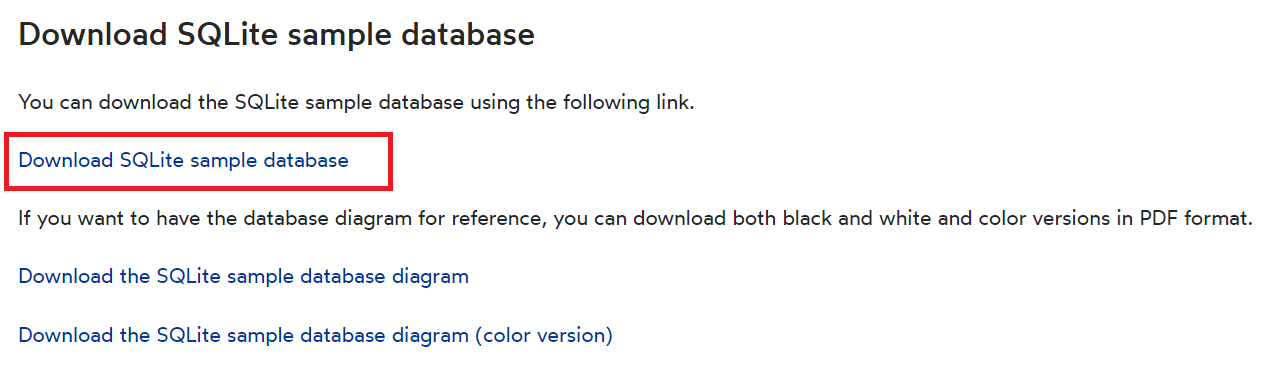
+ DB 파일 경로 : /content/data/chinook.db

+ 실습
  1. DB내의 모든 테이블의 스키마 추출 (Tool의 설명 부분을 작성하기 위함)
  2. 프롬프트에 따라 어떤 SQL을 GPT가 생성하는지 확인
  3. GPT가 생성한 SQL Query를 DB에 요청하여 정보를 가져온 후 해당 내용을 GPT의 입력으로 넣고 질문에 대한 응답 받기
  4. DB내용을 토대로 답변하는 챗봇과 대화하기
    + 예시 프롬프트
      + 고객이 몇명이야?
      + 각 테이블별 정보에 대해 알려줘
      + 고객별 앨범 총 구매액을 리스트 형태로 반환해줘. 총구매액이 높은 순으로 정렬해서 출력해야해줘.

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

+ DB내의 모든 테이블 스키마 추출

In [ ]:
import sqlite3
from pprint import pprint

conn = sqlite3.connect("/content/drive/MyDrive/chinook.db")
print("Opened database successfully")

def get_table_names(conn):
    """DB의 테이블 이름 조회"""
    table_names = []
    tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    for table in tables.fetchall():
        table_names.append(table[0])
    return table_names

# def get_table_schema(conn, table_name):


def get_table_schema(conn, table_name):
    """테이블의 스키마 정보 조회"""
    column_info = []
    schema = conn.execute(f"PRAGMA table_info('{table_name}');").fetchall()
    for col in schema :
      column_info.append({'name':col[1], 'dtype':col[2], 'pk':col[-1]})
    return column_info


def get_database_info(conn):
    """DB의 모든 테이블에 대한 스키마 정보 요약"""
    table_dicts = []
    for table_name in get_table_names(conn):
        columns_names = get_table_schema(conn, table_name)
        table_dicts.append({"table_name": table_name, "column_info": columns_names})
    return table_dicts


database_schema_dict = get_database_info(conn)
pprint(database_schema_dict)
#데이터베이스 모든 테이블 스키마 문자열로 얻기
database_schema_string = "\n".join([f'{table}' for table in database_schema_dict])

+ DB Tool 정의
> query파라미터의 description에 데이터베이스 내의 모든 테이블 스키마를 입력함으로써 GPT에게 DB정보 제공

In [ ]:
#TOOL 및 함수 정의

tools = [
    {
        "type": "function",
        "function": {
            "name": "ask_database",
            "description": "앨범 매출 데이터베이스에 대한 사용자의 질문에 답하기 위해 이 함수를 사용하세요. 입력은 완전한 SQL 쿼리여야 합니다.",
            "parameters": {
                "type": "object",
                "properties": {
                    "query": {
                        "type": "string",
                        "description": f"""
                                사용자의 질문에 답하기 위해 정보를 추출하는 SQL 쿼리.
                                SQL은 다음 데이터베이스 스키마를 사용하여 작성해야 합니다:
                                {database_schema_string}
                                쿼리는 JSON이 아닌 일반 텍스트로 반환되어야 합니다.
                                """,
                    }
                },
                "required": ["query"],
            },
        }
    }
]

def ask_database(conn, query):
    """제공된 SQL 쿼리로 SQLite 데이터베이스를 질의하는 함수입니다."""
    try:
        results = str(conn.execute(query).fetchall())
    except Exception as e:
        results = f"쿼리 실행 중 오류 발생: {e}"

    # print(query, results)
    return results

+ 프롬프트에 따라 어떤 SQL을 GPT가 생성하는지 확인

In [ ]:
# 1단계: 함수 호출로 이어질 수 있는 내용을 포함한 프롬프트
# 이 경우, 모델은 사용자가 요청한 정보가 도구 설명에 전달된 데이터베이스 스키마를 통해 필요한 정보를 취합하여 쿼리를 생성합니다.
messages = [{
    "role": "user",
    "content": "가장 많은 액수로 앨범을 사간 고객은 누구인가요? 액수와 함께 출력해주세요."
}]

chat_response = chat_completion_request(messages, tools)
assistant_message = chat_response.choices[0].message
messages.append(assistant_message)
print(assistant_message.tool_calls[0].function.arguments)  #생성한 SQL

+ GPT가 생성한 SQL Query를 DB에 요청하여 정보를 가져온 후 해당 내용을 GPT의 입력으로 넣고 질문에 대한 응답 받기

In [ ]:
# 2단계: 모델의 응답에 도구 호출이 포함되어 있는지 확인합니다.
tool_calls = assistant_message.tool_calls
if tool_calls:
    # true인 경우 모델은 호출할 도구/함수의 이름과 인수(들)를 반환합니다.
    tool_call_id = tool_calls[0].id
    tool_function_name = tool_calls[0].function.name
    tool_query_string = json.loads(tool_calls[0].function.arguments)['query']

    # 3단계: 함수를 호출하고 결과를 얻습니다. 결과를 messages 리스트에 추가합니다.
    if tool_function_name == 'ask_database':
        results = ask_database(conn, tool_query_string)

        messages.append({
            "role": "tool",
            "tool_call_id": tool_call_id,
            "name": tool_function_name,
            "content": results
        })

        # 4단계: 함수 응답이 추가된 messages 리스트로 GPT API를 호출합니다.
        # tool_calls이 호출되면 반드시 해당 id에 대한 응답이 필요합니다.
        model_response_with_function_call = chat_completion_request(messages)
        print("Assistant:", model_response_with_function_call.choices[0].message.content)
    else:
        print(f"오류: 함수 {tool_function_name}이 존재하지 않습니다")
else:
    # 모델이 호출할 함수를 식별하지 못한 경우 결과를 사용자에게 반환
    print(chat_response.content)

+ DB내용을 토대로 답변하는 챗봇
+ 예시 프롬프트 :
    + 고객이 몇명이야?
    + 각 테이블별 정보에 대해 알려줘
    + 고객별 앨범 총 구매액을 리스트 형태로 반환해줘. 총구매액이 높은 순으로 정렬해서 출력해야해줘.

In [ ]:
messages = [
    {"role": "system", "content": "당신은 사용자 질문에 답변하는 챗봇입니다."},
    {"role": "system", "content": "데이터베이스 및 음악 앨범 관련 질의가 있는 경우 관련 함수를 호출하세요."},
    {"role": "system", "content": "함수 호출이 아닌 답변의 경우 사용자가 읽기 쉽도록 마크다운 형태로 정리해서 출력하세요."},
]

# '종료' 입력 전까지 대화
user_input = ''
while True:
    user_input = input("You: ")
    if "종료" in user_input : break
    messages.append({"role": "user", "content": user_input})

    chat_response = chat_completion_request(messages, tools)

    assistant_message = chat_response.choices[0].message
    messages.append(assistant_message)
    # 함수 호출 정보 파싱
    if assistant_message.tool_calls :
        for msg in assistant_message.tool_calls :
          if "function" in msg.type:
              tool_id = msg.id  #함수 이름
              function_call = msg.function #함수 정보 가져오기
              function_name = function_call.name  #함수 이름
              function_args = json.loads(function_call.arguments)['query'] #함수 파라미터

              # 실제 함수 호출
              if function_name == "ask_database":
                  result = ask_database(conn, function_args)

              messages.append({
                  "role": "tool",
                  "tool_call_id": tool_id,
                  "name": function_name,
                  "content": result
              })
        chat_response = chat_completion_request(messages)

    #결과 출력
    assistant_reply = chat_response.choices[0].message.content
    messages.append({"role": "assistant", "content": assistant_reply})
    print(f"Assistant: {assistant_reply}")